In [1]:
library(tidyverse)
# packages for r to interact with stan
library(rstanarm)
# oackages to explore a bayesian model
library(bayestestR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Rcpp

This is rstanarm version 2.21.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())



In [2]:
##data-------------------------------------
damage <- c(0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 0, 1, 1, 2, 5, 1, 1, 5, 5, 7) 
type <- c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1) 
bombload <- c(4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 7, 7, 7, 10, 10, 10, 12, 12, 12, 8, 8, 8, 14, 14, 14)
airexp <- c(91.5, 84, 76.5, 69, 61.5, 80, 72.5, 65, 57.5, 50, 103, 95.5, 88, 80.5, 73, 116.1, 100.6, 85, 69.4, 53.9, 
112.3, 96.7, 81.1, 65.6, 50, 120, 104.4, 88.9, 73.7, 57.8)

bombs <- tibble(damage, type, bombload, airexp) %>% 
                mutate(damage = as.integer(damage),
                type = as.factor(type),
                bombload = as.integer(bombload)
                )
str(bombs)

tibble [30 × 4] (S3: tbl_df/tbl/data.frame)
 $ damage  : int [1:30] 0 1 0 0 0 0 1 0 0 2 ...
 $ type    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ bombload: int [1:30] 4 4 4 5 5 5 6 6 6 7 ...
 $ airexp  : num [1:30] 91.5 84 76.5 69 61.5 80 72.5 65 57.5 50 ...


damage: the number of damaged locations of the aircraft

type: binary variable which indicates the type of the plane (0 for A4, B for A6)

bombload: the aircraft bomb load in tons

airexp: the total months of aircrew experience.

$$damage_i = Poisson(\lambda_i)$$
$$log(\lambda_i) = \beta_1 + \beta_2 * type_i + \beta_3 * bombload_i + \beta_4 * airexp_i$$

In [3]:
model_fit_stan <- stan_glm(damage ~ ., data = bombs, family = poisson)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000154 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.54 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.047463 seconds (Warm-up)
Chain 1:                0.053028 seconds (Sampling)
Chain 1:                0.

In [4]:
summary(model_fit_stan)


Model Info:
 function:     stan_glm
 family:       poisson [log]
 formula:      damage ~ .
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 30
 predictors:   4

Estimates:
              mean   sd   10%   50%   90%
(Intercept) -0.5    0.9 -1.6  -0.5   0.6 
type1        0.6    0.5 -0.1   0.6   1.2 
bombload     0.2    0.1  0.1   0.2   0.3 
airexp       0.0    0.0  0.0   0.0   0.0 

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 1.5    0.3  1.1   1.5   1.9  

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   0.0  1.0  2520 
type1         0.0  1.0  2129 
bombload      0.0  1.0  2088 
airexp        0.0  1.0  2757 
mean_PPD      0.0  1.0  3481 
log-posterior 0.0  1.0  1603 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure

In [5]:
describe_posterior(model_fit_stan)

,Parameter,Median,CI,CI_low,CI_high,pd,ROPE_CI,ROPE_low,ROPE_high,ROPE_Percentage,Rhat,ESS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(Intercept),-0.47107295,0.95,-2.21467772,1.180227826,0.70100,0.95,-0.1,0.1,0.08602999,0.9999513,2520.040
4,type1,0.58172851,0.95,-0.41396825,1.580464772,0.87325,0.95,-0.1,0.1,0.08050513,1.0008668,2128.638
3,bombload,0.16882319,0.95,0.03401577,0.293140505,0.99450,0.95,-0.1,0.1,0.13970008,1.0006277,2087.753
2,airexp,-0.01363331,0.95,-0.02985410,0.001960633,0.95750,0.95,-0.1,0.1,1.00000000,1.0000130,2757.132


In [6]:
library(insight)
posteriors <- get_parameters(model_fit_stan)


Attaching package: ‘insight’


The following object is masked from ‘package:bayestestR’:

    reshape_ci




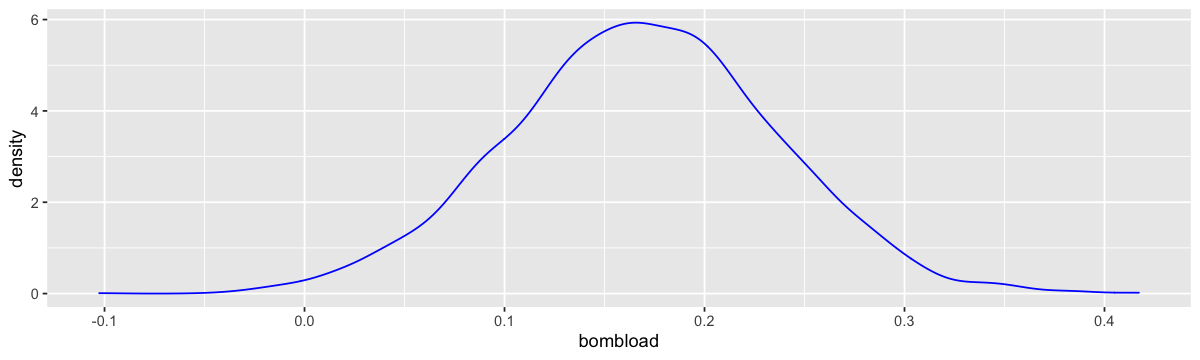

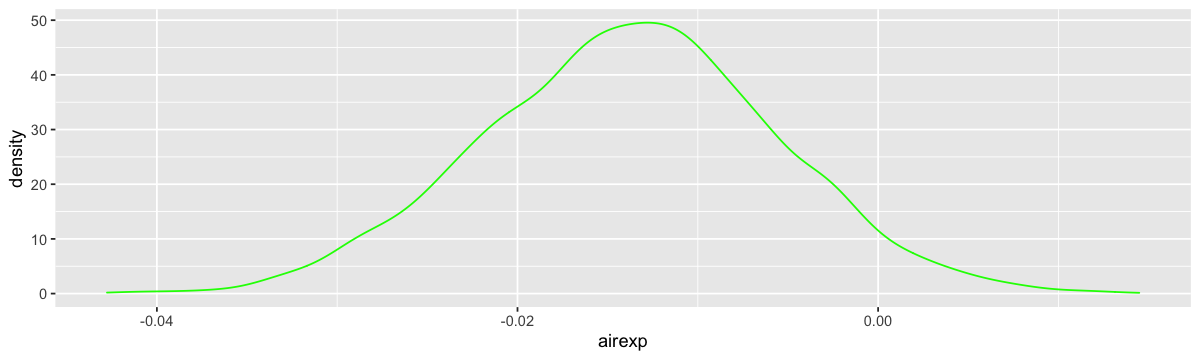

In [7]:
options(repr.plot.width=10, repr.plot.height=3)

ggplot(posteriors) +
    geom_density(mapping = aes(x = bombload), col = "blue")
ggplot(posteriors) +
    geom_density(mapping = aes(x = airexp), col = "green")